# full explainaction of hot to clearn the data from sklearn and how to preproess the code with colum tyep and how to use the pipeline in sklear and train the model 

## load the nessasory libararies

In [1]:
import pandas as pd
import numpy as np
import random
from faker import Faker
import datetime

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb

import matplotlib.pyplot as plt
import seaborn as sns

## for this usecase i used the samole data from the faker for generate the fake dataset

In [ ]:
# create the 100000 sample dataset
def generate_fake_claims(n=10000):
    fake = Faker()
    data = []
    
    for _ in range(n):
        admit_date = fake.date_between(start_date='-2y', end_date='-1y')
        discharge_date = admit_date + datetime.timedelta(days=random.randint(1, 10))
        entry_date = discharge_date + datetime.timedelta(days=random.randint(1, 15))
        update_date = entry_date + datetime.timedelta(days=random.randint(1, 15))
        
        trans_amount = round(random.uniform(1000, 10000), 2)
        pay_amount = round(trans_amount * random.uniform(0.3, 0.9), 2)
        rev_amount = trans_amount - pay_amount
        delay = (update_date - entry_date).days > 10
        notes = fake.sentence(nb_words=10) + (" missing documents" if delay else " complete file")

        data.append({
            "AccountType": random.choice(["Inpatient", "Outpatient"]),
            "CurrentPrimaryInsurance": random.choice(["Insurer A", "Insurer B", "Insurer C"]),
            "CurrentFinancialClass": random.choice(["Private", "Govt", "Self-pay"]),
            "TransactionInsurance": random.choice(["Yes", "No"]),
            "BillType": random.choice(["Type A", "Type B", "Type C"]),
            "ClaimDeptResponsible": random.choice(["Cardiology", "Radiology", "Billing"]),
            "TransAmount": trans_amount,
            "PAYAmount": pay_amount,
            "REVAmount": rev_amount,
            "Notes": notes,
            "IsDelayed": int(delay)
        })
    return pd.DataFrame(data)

df = generate_fake_claims(100000)
df.head()
df["Notes"]

0        Image decide movie within return wall talk exa...
1        Such law read sister throw government yard env...
2                   Build skill already wait concern need.
3        Fall her team wish moment defense edge everyth...
4        Ability small religious edge computer crime th...
                               ...                        
99995    Cultural show face floor fear rock year third ...
99996          Same team where it forget buy decade avoid.
99997    Break career quickly company way life task eac...
99998    Try talk bag people low rich them step discove...
99999    Only quickly outside people control capital as...
Name: Notes, Length: 100000, dtype: object

In [29]:
# now define the sample insuran data
df_data = pd.read_csv("dataset/enhanced_health_insurance_claims.csv")

In [33]:
df_data.head()
# df_data.isnull().sum()

,ClaimID,PatientID,ProviderID,ClaimAmount,ClaimDate,DiagnosisCode,ProcedureCode,PatientAge,PatientGender,ProviderSpecialty,ClaimStatus,PatientIncome,PatientMaritalStatus,PatientEmploymentStatus,ProviderLocation,ClaimType,ClaimSubmissionMethod
0,10944daf-f7d5-4e1d-8216-72ffa609fe41,8552381d-7960-4f64-b190-b20b8ada00a1,4a4cb19c-4863-41cf-84b0-c2b21aace988,3807.95,2024-06-07,yy006,hd662,16,M,Cardiology,Pending,90279.43,Married,Retired,Jameshaven,Routine,Paper
1,fcbebb25-fc24-4c0f-a966-749edcf83fb1,327f43ad-e3bd-4473-a9ed-46483a0a156f,422e02dd-c1fd-43dd-8af4-0c3523f997b1,9512.07,2023-05-30,tD052,mH831,27,M,Pediatrics,Approved,130448.02,Single,Student,Beltrantown,Routine,Online
2,9e9983e7-9ea7-45f5-84d8-ce49ccd8a4a1,6f3acdf7-73aa-4afa-9c2e-b25b27bdb5b0,f7733b3f-0980-47b5-a7a0-ee390869355b,7346.74,2022-09-27,zx832,dg637,40,F,Cardiology,Pending,82417.54,Divorced,Employed,West Charlesport,Emergency,Online
3,a06273ed-44bb-452b-bbad-8618de080494,5d58e183-701e-406c-a8c6-5b73cac5e912,f7a04581-de96-44ee-b773-8adac02baa59,6026.72,2023-06-25,kr421,kG326,65,M,Neurology,Pending,68516.96,Widowed,Student,West Aprilhaven,Routine,Phone
4,f702a717-254b-4cff-a0c7-8395db2f6616,8a8ebdf6-3af0-4f14-82f3-37b937c3d270,b80b9e77-97f0-47d7-b561-19f9658a7bdf,1644.58,2023-07-24,LZ261,cx805,24,M,General Practice,Pending,84122.17,Married,Student,Lake Michele,Inpatient,Phone


In [ ]:
# stwp 2
df_data['delay'] = np.linspace(5, 15, len(df_data))

In [44]:

#steo 2
# the feature are the input data to the ml models

features = [
    "ClaimAmount", "DiagnosisCode",
    "ProcedureCode", "PatientAge", "ProviderSpecialty",
    "ClaimStatus", "PatientIncome", "PatientMaritalStatus", "PatientEmploymentStatus","ClaimType","ClaimSubmissionMethod"
]

X_data = df_data[features]  # Features

# the output weather it was delay are not
y_data = df_data["delay"]  # Target


In [49]:
#step 2

# Define the preprocessor
preprocessor = ColumnTransformer([
    ("float", StandardScaler(), ["ClaimAmount", "PatientAge", "PatientIncome"]),
    
    ("cat", OneHotEncoder(), [
        "DiagnosisCode", "ProcedureCode", "ProviderSpecialty",
        "ClaimStatus", "PatientMaritalStatus", "PatientEmploymentStatus",
        "ClaimType", "ClaimSubmissionMethod"
    ])
])

In [50]:

#stage 2
#expnanactio = We're teaching the model using one set of claims (train set) and testing how well it performs on totally new claims (test set) that it’s never seen before.
#  Step 5: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data , test_size=0.2, random_state=42)


In [51]:
# Define and Train Models
# stage 2
# in the pipline we cotain the two main thing preproeceeor it will contain the streucture coilum we process the data in step 4 and classider contain the model to tarin

xgb_model = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", xgb.XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42))
])

# it will contain the 80% of the data
xgb_model.fit(X_train, y_train)


ValueError: Invalid classes inferred from unique values of `y`.  Expected: [   0    1    2 ... 3597 3598 3599], got [ 5.          5.00222272  5.00444543 ... 14.99555457 14.99777728
 15.        ]

In [22]:
# the feature are the input data to the ml models

features = [
    "AccountType", "CurrentPrimaryInsurance", "CurrentFinancialClass",
    "TransactionInsurance", "BillType", "ClaimDeptResponsible",
    "TransAmount", "PAYAmount", "REVAmount", "Notes"
]

X = df[features]  # Features

# the output weather it was delay are not
y = df["IsDelayed"]  # Target


In [23]:
# columntransformer this will trainformthe colum to require colum type

preprocessor = ColumnTransformer([
    # stabdardsclare it was represending the numerical values
    ("num", StandardScaler(), ["TransAmount", "PAYAmount", "REVAmount"]),
    # when ever we use like option for the colums we can use the onwhorencoder
    ("cat", OneHotEncoder(), [
        "AccountType", "CurrentPrimaryInsurance", "CurrentFinancialClass",
        "TransactionInsurance", "BillType", "ClaimDeptResponsible"
    ]),
    #it will turn the nodes into the numicraical values
    ("txt", TfidfVectorizer(max_features=50), "Notes")
])


In [24]:
#expnanactio = We're teaching the model using one set of claims (train set) and testing how well it performs on totally new claims (test set) that it’s never seen before.
#  Step 5: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [25]:
# Define and Train Models

# in the pipline we cotain the two main thing preproeceeor it will contain the streucture coilum we process the data in step 4 and classider contain the model to tarin

xgb_model = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", xgb.XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42))
])

# it will contain the 80% of the data
xgb_model.fit(X_train, y_train)


/home/basil/changpond_projects/.venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:16:49] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['TransAmount', 'PAYAmount',
                                                   'REVAmount']),
                                                 ('cat', OneHotEncoder(),
                                                  ['AccountType',
                                                   'CurrentPrimaryInsurance',
                                                   'CurrentFinancialClass',
                                                   'TransactionInsurance',
                                                   'BillType',
                                                   'ClaimDeptResponsible']),
                                                 ('txt',
                                                  TfidfVectorizer(max_features=50),
                                                  'Notes')])),
                ('classifier',
                 XGBClass...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [8]:
# for randome forret method

rf_model = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(n_estimators=100, random_state=42))
])
rf_model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['TransAmount', 'PAYAmount',
                                                   'REVAmount']),
                                                 ('cat', OneHotEncoder(),
                                                  ['AccountType',
                                                   'CurrentPrimaryInsurance',
                                                   'CurrentFinancialClass',
                                                   'TransactionInsurance',
                                                   'BillType',
                                                   'ClaimDeptResponsible']),
                                                 ('txt',
                                                  TfidfVectorizer(max_features=50),
                                                  'Notes')])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [9]:
# for  logical regression method

log_model = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(max_iter=500))
])
log_model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['TransAmount', 'PAYAmount',
                                                   'REVAmount']),
                                                 ('cat', OneHotEncoder(),
                                                  ['AccountType',
                                                   'CurrentPrimaryInsurance',
                                                   'CurrentFinancialClass',
                                                   'TransactionInsurance',
                                                   'BillType',
                                                   'ClaimDeptResponsible']),
                                                 ('txt',
                                                  TfidfVectorizer(max_features=50),
                                                  'Notes')])),
                ('classifier', LogisticRegression(max_iter=500))])

In [10]:
models = {
    "XGBoost": xgb_model,
    "Random Forest": rf_model,
    "Logistic Regression": log_model
}

for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"\n==== {name} ====")
    print(classification_report(y_test, y_pred))



==== XGBoost ====
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13391
           1       1.00      1.00      1.00      6609

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000


==== Random Forest ====
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13391
           1       1.00      1.00      1.00      6609

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000


==== Logistic Regression ====
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13391
           1       1.00      1.00      1.00      6609

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000

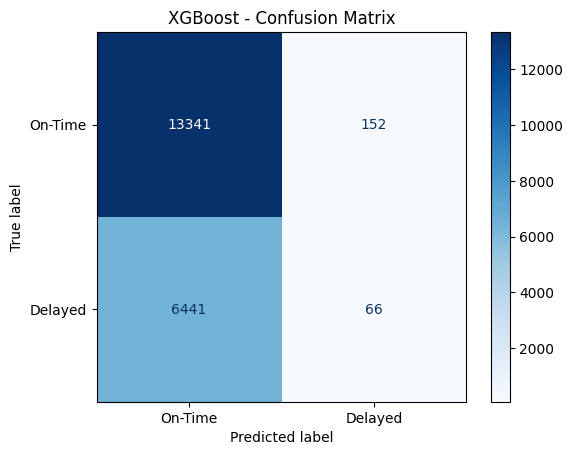

In [26]:
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = xgb_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["On-Time", "Delayed"])
disp.plot(cmap='Blues')
plt.title("XGBoost - Confusion Matrix")
plt.show()


In [12]:
import joblib

# Saving the trained model (XGBoost, Random Forest, etc.)
joblib.dump(xgb_model, 'sample_model_xgboost.pkl')  # You can name your file whatever you want


['sample_model_xgboost.pkl']

In [14]:
from sklearn.preprocessing import StandardScaler
import joblib

# Assuming your training data is in a DataFrame named 'X_train'
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Save the scaler
joblib.dump(scaler, 'sample.pkl')


ValueError: could not convert string to float: 'Inpatient'

In [28]:
# Assuming you have a new claim data
new_data = pd.DataFrame([{
    "AccountType": "Inpatient",  # Categorical feature
    "CurrentPrimaryInsurance": "Insurer B",
    "CurrentFinancialClass": "Private",
    "TransactionInsurance": "Yes",
    "BillType": "Type B",
    "ClaimDeptResponsible": "Radiology",
    "TransAmount": 1500,
    "PAYAmount": 1200,
    "REVAmount": 150,
    "Notes": "hello how are you"
}])

# Make the prediction
prediction = xgb_model.predict(new_data)

# Output the prediction
if prediction[0] == 0:
    print("The claim is NOT delayed.")
else:
    print("The claim is delayed.")


The claim is NOT delayed.
